Imports

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Analyze Data

In [ ]:
# publicly hosted data
data_url = 'https://archive.org/download/housing_202309/housing.csv'
housing_data = pd.read_csv(data_url)

In [ ]:
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
# describe data
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

Data Cleaning and Preprocessing

In [ ]:
# check if Null values exist
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# remove all null values
housing_data = housing_data.dropna()

In [ ]:
# encode labels into numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
housing_data['ocean_proximity'] = label_encoder.fit_transform(housing_data['ocean_proximity'])
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0      1138.0         8.3014            358500.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3

In [ ]:
# we got 5 unique labels
print(np.unique(housing_data['ocean_proximity']))

[0 1 2 3 4]


longitude                Axes(0.125,0.712609;0.168478x0.167391)
latitude              Axes(0.327174,0.712609;0.168478x0.167391)
housing_median_age    Axes(0.529348,0.712609;0.168478x0.167391)
total_rooms           Axes(0.731522,0.712609;0.168478x0.167391)
total_bedrooms           Axes(0.125,0.511739;0.168478x0.167391)
population            Axes(0.327174,0.511739;0.168478x0.167391)
households            Axes(0.529348,0.511739;0.168478x0.167391)
median_income         Axes(0.731522,0.511739;0.168478x0.167391)
median_house_value        Axes(0.125,0.31087;0.168478x0.167391)
ocean_proximity        Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

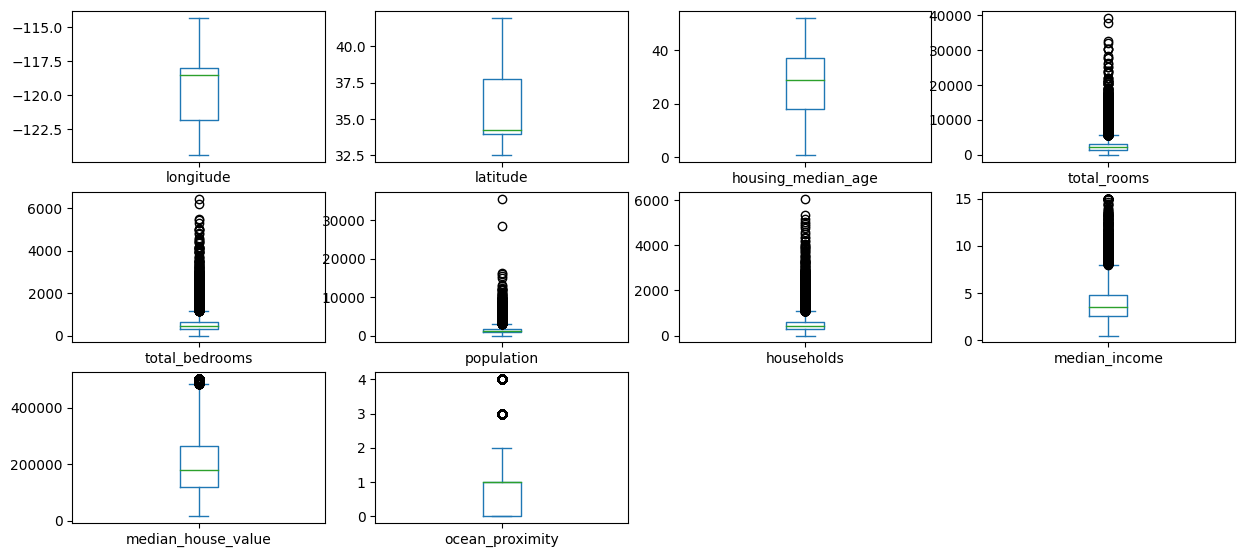

In [ ]:
# plotting box plots to check for outliers
housing_data.plot(kind = 'box', subplots = True, layout = (4,4), figsize = (15,9))

In [ ]:
# method to detect and eliminate outlier from the data based on inter-quartile range
def get_outliers(dataframe,column):
    info = dataframe[column].describe()
    info_dict = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = info[info_dict['25']]
    Q3 = info[info_dict['75']]
    lower_bound = Q1-1.5*(Q3-Q1)
    upper_bound = Q3+1.5*(Q3-Q1)
    data = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    updated_data = dataframe[~dataframe[column].isin(data[column])]
    return updated_data

In [ ]:
dwo = get_outliers(housing_data,"total_rooms")

In [ ]:
dwo2 = get_outliers(dwo,"total_bedrooms")

In [ ]:
dwo3 = get_outliers(dwo2,"population")

In [ ]:
dwo4 = get_outliers(dwo3,"households")

In [ ]:
dwo5 = get_outliers(dwo4,"median_income")

In [ ]:
dwo5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17357 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17357 non-null  float64
 1   latitude            17357 non-null  float64
 2   housing_median_age  17357 non-null  float64
 3   total_rooms         17357 non-null  float64
 4   total_bedrooms      17357 non-null  float64
 5   population          17357 non-null  float64
 6   households          17357 non-null  float64
 7   median_income       17357 non-null  float64
 8   median_house_value  17357 non-null  float64
 9   ocean_proximity     17357 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


Data Visualization

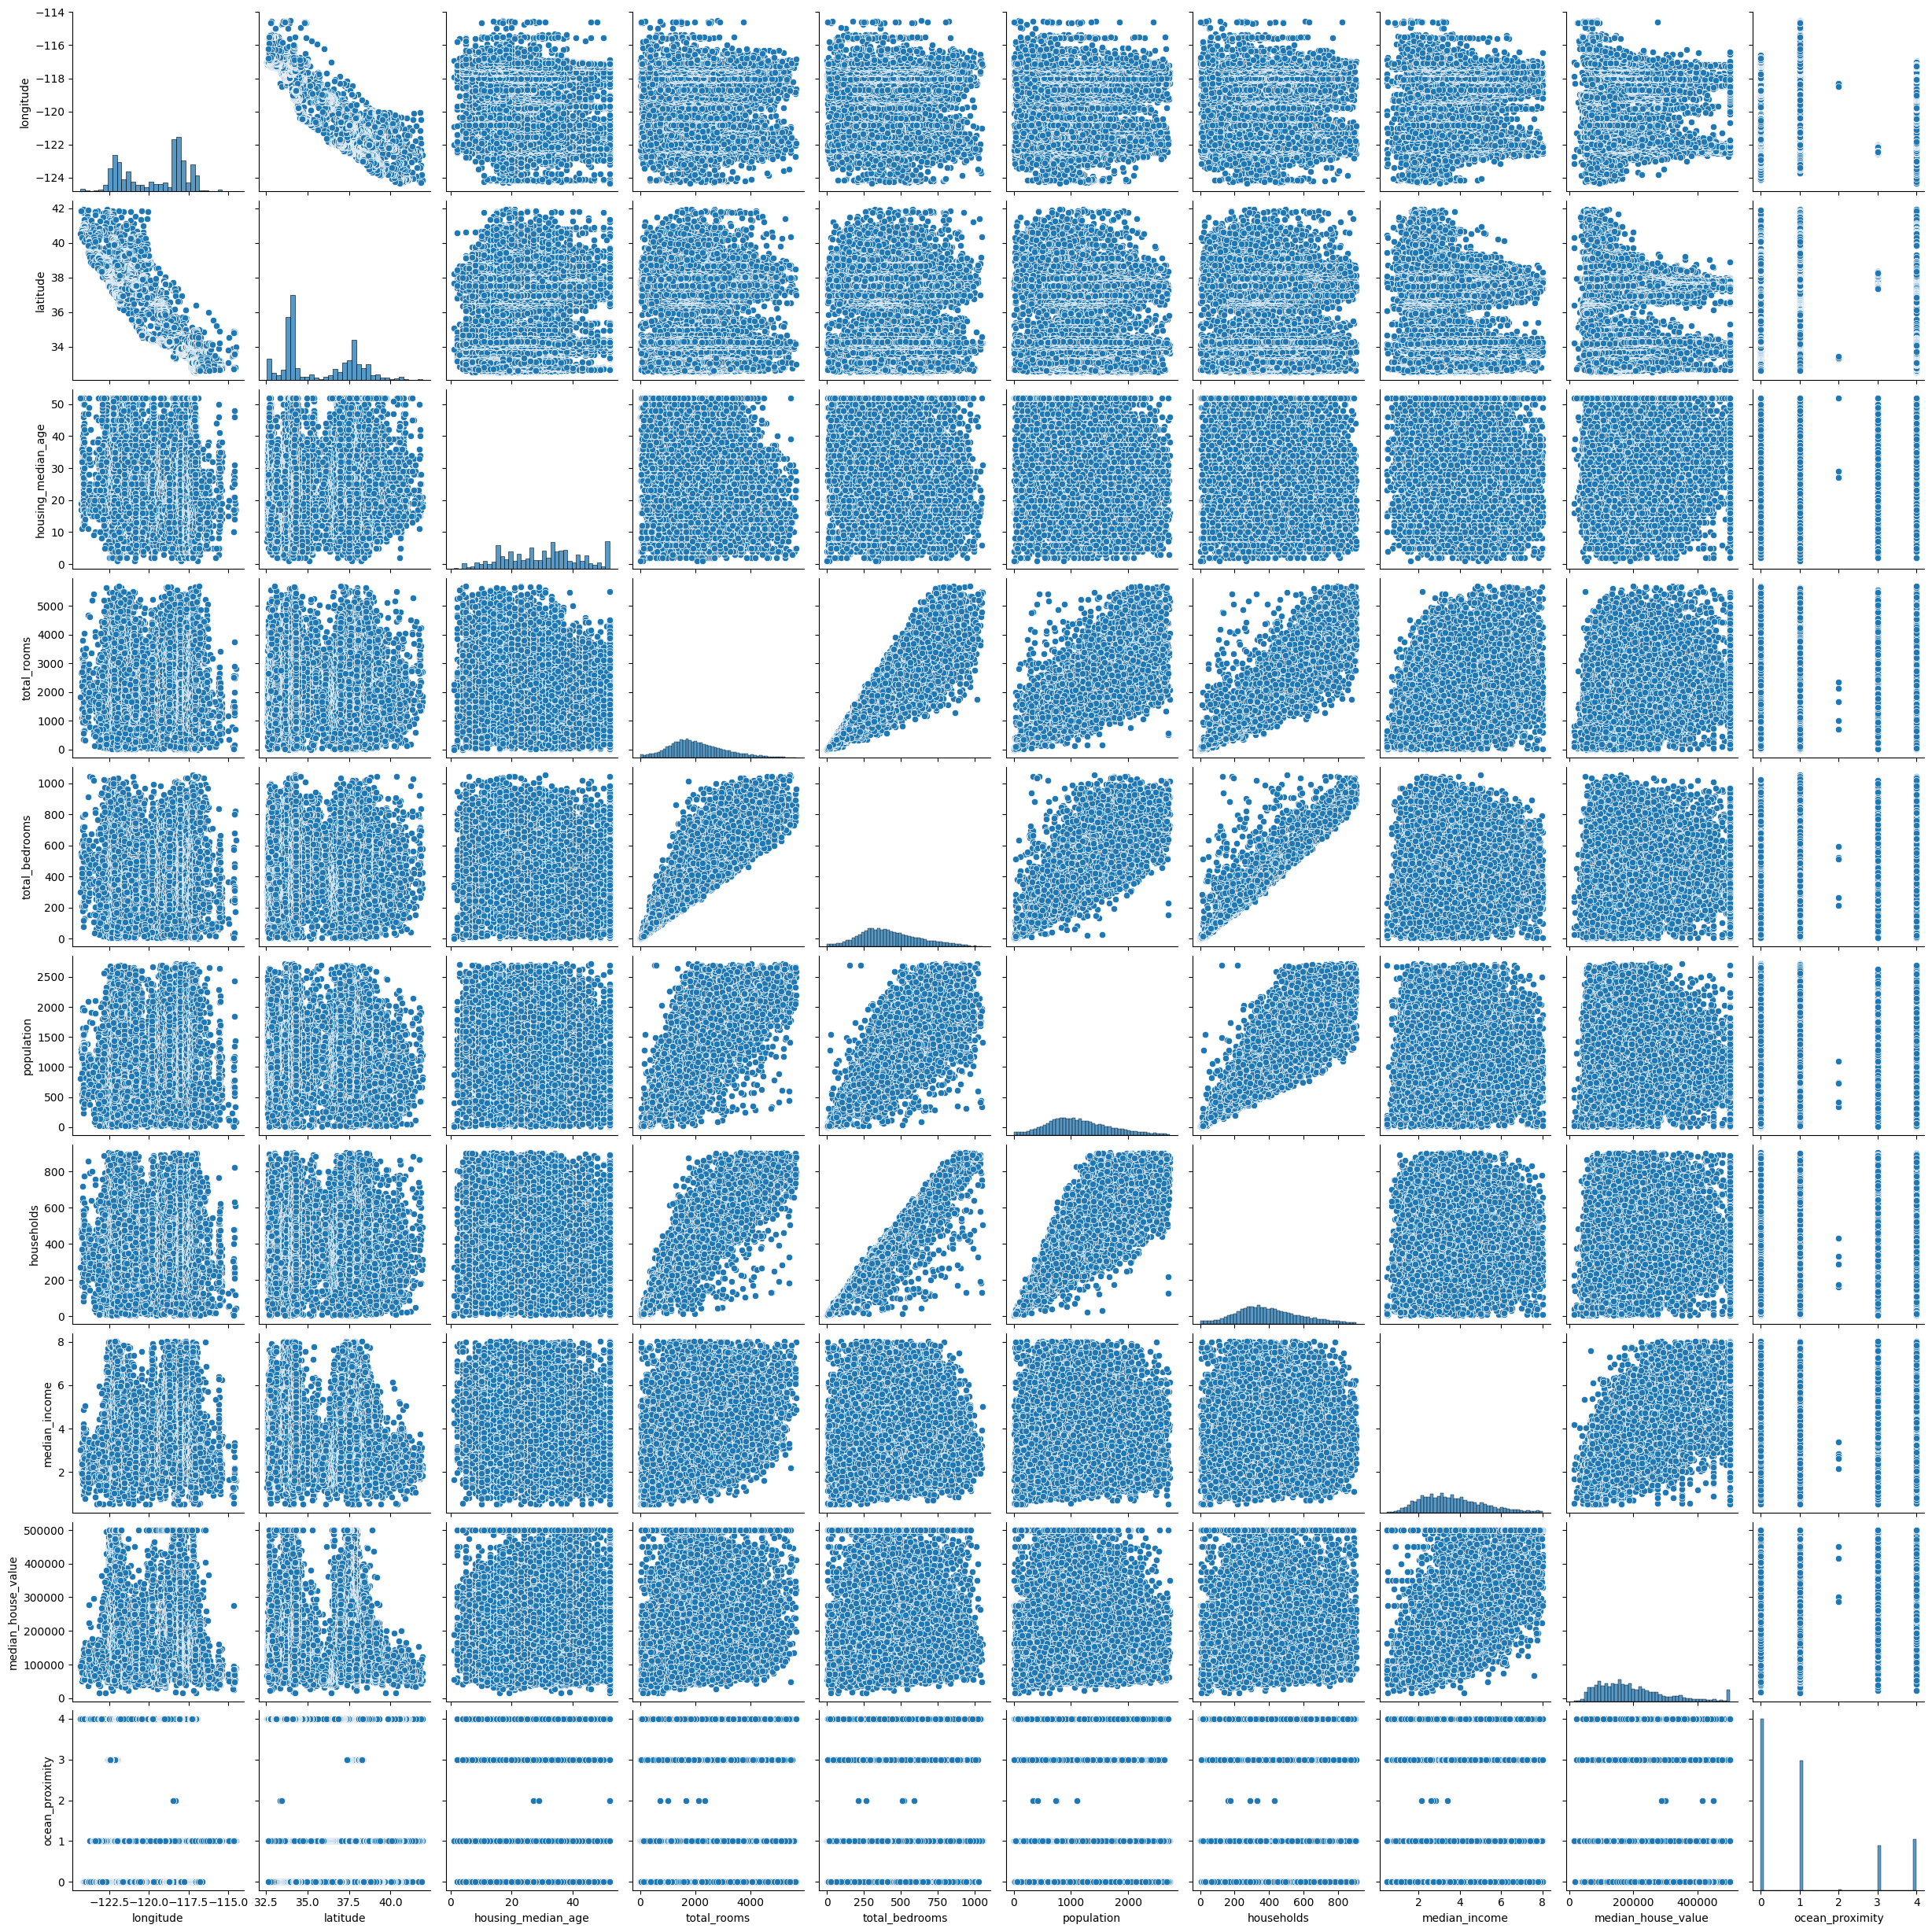

In [ ]:
sns.pairplot(data = dwo5)

In [ ]:
cleaned_data = dwo5
cleaned_data.duplicated().sum()

0

In [ ]:
corr_mat = cleaned_data.corr()
print(corr_mat)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.922957           -0.091031    -0.014394   
latitude            -0.922957  1.000000           -0.012390     0.012722   
housing_median_age  -0.091031 -0.012390            1.000000    -0.266028   
total_rooms         -0.014394  0.012722           -0.266028     1.000000   
total_bedrooms       0.023395 -0.035875           -0.201228     0.880939   
population           0.106903 -0.133711           -0.176900     0.754556   
households           0.021196 -0.058949           -0.169097     0.872269   
median_income       -0.000974 -0.098745           -0.137524     0.300007   
median_house_value  -0.032148 -0.162467            0.131487     0.187142   
ocean_proximity     -0.284021  0.191647            0.106827     0.010919   

                    total_bedrooms  population  households  median_income  \
longitude                 0.023395    0.106903    0.021196      -0.000974   
latitude 

Feature Selection

<Axes: >

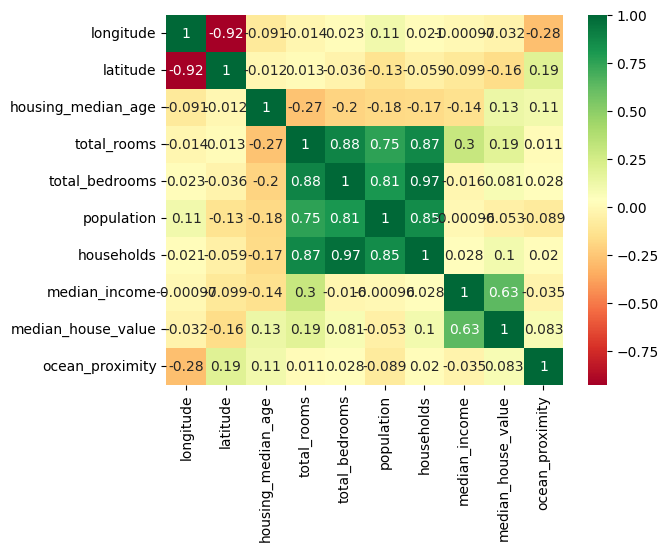

In [ ]:
sns.heatmap(corr_mat,cmap="RdYlGn", annot = True)

In [ ]:
cor_target = corr_mat['median_house_value']
req_features = cor_target[cor_target>0.04]

In [ ]:
req_features

housing_median_age    0.131487
total_rooms           0.187142
total_bedrooms        0.081440
households            0.104192
median_income         0.634759
median_house_value    1.000000
ocean_proximity       0.082824
Name: median_house_value, dtype: float64

In [ ]:
cleaned_data = cleaned_data[['median_income','total_rooms', 'housing_median_age','households','ocean_proximity','total_bedrooms', 'median_house_value']]

median_income            Axes(0.125,0.712609;0.168478x0.167391)
total_rooms           Axes(0.327174,0.712609;0.168478x0.167391)
housing_median_age    Axes(0.529348,0.712609;0.168478x0.167391)
households            Axes(0.731522,0.712609;0.168478x0.167391)
ocean_proximity          Axes(0.125,0.511739;0.168478x0.167391)
total_bedrooms        Axes(0.327174,0.511739;0.168478x0.167391)
median_house_value    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

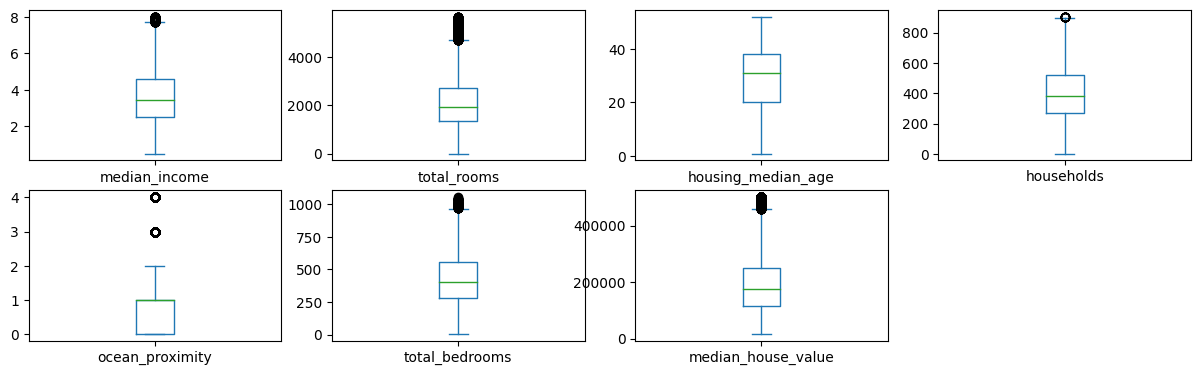

In [ ]:
cleaned_data.plot(kind = 'box', subplots = True, layout = (4,4), figsize = (15,9))

In [ ]:
# separate feature dataframe and label dataframe
X=cleaned_data.iloc[:, 0:(cleaned_data.shape[1]-1)]
Y=cleaned_data.iloc[:, cleaned_data.shape[1]-1]

In [ ]:
# normalize the data
X = (X-X.mean()) / X.std()

Dataset Splitting

In [ ]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(13885, 6)
(13885,)
(3472, 6)
(3472,)


Develop Linear Regression Model

In [ ]:
# defining the gradient_descent for the given X and Y

class LinearRegression():
    def __init__(self):
        self.theta = [];
        pass

    def custom_gradient_descent(self, X, y, epochs, rate):
        # initialize radom weights
        self.theta = np.random.rand(X.shape[1] + 1, 1).ravel()
        # stack up x0 as all 1 with X
        vectorX = np.c_[np.ones((len(X),1)), X]
        costs = []
        m = len(vectorX)
        for i in range(epochs):
          # calculate derivative of cost function (gradient)
          gradient = 2/len(vectorX)*vectorX.T.dot(vectorX.dot(self.theta) - y.ravel())
          # update weights
          self.theta -= rate*gradient
          y_pred = vectorX.dot(self.theta)
          # calculate cost
          cost = 1/(2*m)*(y - y_pred)**2
          costs.append(cost.sum())
        return costs, self.theta

    # prediction method
    def predict(self, X_test):
        n = X_test.shape[0]
        vector_X_test = np.c_[np.ones((len(X_test),1)), X_test]
        return vector_X_test.dot(self.theta)

    # evaluation method for model performance
    def evaluate(self, y_test, y_pred):
        mse = 1/2*((y_test - y_pred)**2).mean()
        return mse

In [ ]:
model = LinearRegression()

Hyperparameter Tuning

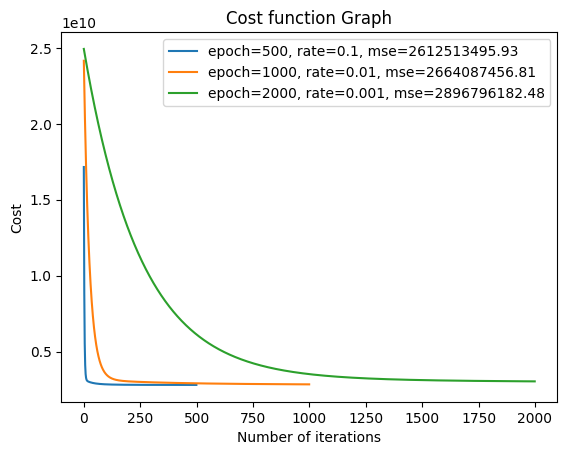

In [ ]:
# check for different combinations of learning rates and iterations, to get the best MSE.

tuning_params = [(500, 0.1), (1000, 0.01), (2000, 0.001)]
model_params = []

for i,x in enumerate(tuning_params):
  n_iters, lr = x
  costs, theta = model.custom_gradient_descent(X_train, Y_train, n_iters, lr)
  y_pred = model.predict(X_test)
  mse = model.evaluate(Y_test, y_pred)

  model_params.append({
    'no_of_iterations': n_iters,
    'learning_rate': lr,
    'costs': costs,
    'theta': theta,
    'mse': mse
  })

  label_str = 'epoch=' + str(n_iters) + ", rate=" + str(lr)+ ", mse=" + "{:.2f}".format(mse)
  plt.plot(costs, label = label_str)

plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()


Evaulate Results

In [ ]:
learning_rate = 0.1
n_iters = 500
costs, theta = model.custom_gradient_descent(X_train, Y_train, n_iters, learning_rate)

In [ ]:
print("Minimum cost:", min(costs))
print("Final weights:", theta)

Minimum cost: 2801615057.420394
Final weights: [196578.24458721  90930.41489058 -61681.54720657  23135.05744695
  -3908.86871441   7662.44782227  72276.96196094]


Text(0, 0.5, 'Cost')

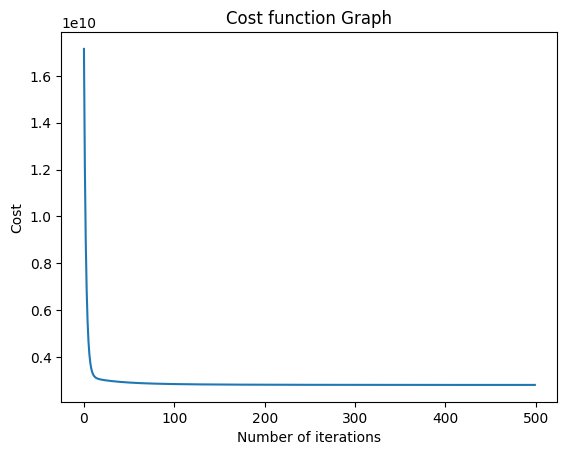

In [ ]:
plt.plot(costs)
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[137145.2534899  242374.10583144 193593.16580046 ... 154975.12234353
 245418.66329771 203464.32439493]


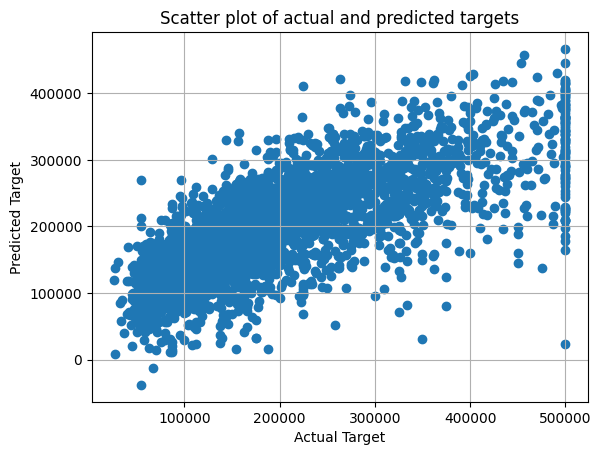

In [ ]:
plt.scatter(Y_test,y_pred)
plt.grid()
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Scatter plot of actual and predicted targets')
plt.show()

Mean Squared Error

In [ ]:
mse = model.evaluate(Y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 2612513490.5161414


R2 Score

In [ ]:
from sklearn.metrics import r2_score
print("Coefficient of determination (R2):", r2_score(Y_test, y_pred))

Coefficient of determination (R2): 0.550280101269147


In [ ]:
pd.DataFrame(model_params)

no_of_iterations  learning_rate  \
0               500          0.100   
1              1000          0.010   
2              2000          0.001   

                                               costs  \
0  [17152936293.350601, 12142455251.339937, 89284...   
1  [24151424819.130005, 23319387187.62739, 225208...   
2  [24930900547.46384, 24843747233.00403, 2475694...   

                                               theta           mse  
0  [196578.24458431447, 90930.41312610856, -61681...  2.612513e+09  
1  [196588.59914560354, 84174.23267454158, -43814...  2.664087e+09  
2  [193020.89124639117, 69819.0738348185, -4576.9...  2.896796e+09

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_24, *['no_of_iterations'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_25, *['learning_rate'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_26, *['mse'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_27, *['no_of_iterations'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_28, *['learning_rate'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_29, *['mse'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_30, *[[['no_of_iterations', 'learning_rate'], ['learning_rate', 'mse']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_31, *['no_of_iterations', 'learning_rate', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_32, *['no_of_iterations', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_33, *['mse', 'learning_rate', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_34, *['mse', 'count()', None], **{})
chart